In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, get_window
from scipy.io import wavfile
import os
import IPython
from pydub import AudioSegment
np.seterr(divide = 'ignore'); 

In [7]:
len_input = 2204   
num_freq = 201            # sampling rate
nfft = 2*(num_freq-1)     # window for fft
noverlap = 200            # overlap of fft
len_output = 550          # length of output sequense
len_positive = 25         # length of ones after a positive
num_background = 3
num_negative = 4
num_positive = 4

In [8]:
backgrounds = []    # reading raw wave files
positives = []
negatives = []

for i in range(num_background):
    temp = AudioSegment.from_wav("./samples/backgrounds/" + str(i+1) + ".wav")
    backgrounds.append(temp)
    
for i in range(num_negative):
    temp = AudioSegment.from_wav("./samples/negatives/" + str(i+1) + ".wav")
    negatives.append(temp)
    
for i in range(num_positive):
    temp = AudioSegment.from_wav("./samples/positives/" + str(i+1) + ".wav")
    positives.append(temp)

In [9]:
def generate_sample(backgrounds, positives, negatives):
    
    sample = backgrounds[np.random.randint(len(backgrounds))]   # pick a background
    len_sample = len(sample)
    available_space = [[0, len_sample]]   # available space for inserting positives and negatives
    output = np.zeros((1,len_output))
    
    num_positive = max(1, np.random.randint(len(positives)))   # number of positives to be inserted
    num_negative = np.random.randint(len(negatives))   # number of negatives to be inserted
    
    for i in range(num_positive):   # insert positives
        
        insert = positives[np.random.randint(len(positives))]   # pick a positive to insert
        len_insert = len(insert)
        num_segment = len(available_space)
        IsAvailable = np.ones(num_segment) 
        flag_search = True
        
        while flag_search:
            segment = np.random.randint(num_segment)
            len_segment = available_space[segment][1] - available_space[segment][0]
            if 1 == IsAvailable[segment] and (len_segment) >= len_insert:
                insert_time = available_space[segment][0] + np.random.randint(max(1, len_segment - len_insert))
                over_time = insert_time + len_insert
                sample = sample.overlay(insert, position = insert_time)   # insert positive
                output_start = int((insert_time / len_sample) * len_output) + 1   # insert 1s to output
                output_stop = output_start + len_positive
                output[output_start:output_stop] = 1
                tmp = available_space[segment][1]   # update available space for insertion
                available_space[segment][1] = insert_time - 1
                available_space.append([over_time + 1, tmp])
                flag_search = False
            else:
                IsAvailable[segment] = 0
            if 0 == np.count_nonzero(IsAvailable):
                flag_search = False # sorry, there is no room to insert
    
    for i in range(num_negative):   # insert negatives
        
        insert = negatives[np.random.randint(len(negatives))]   # pick a negative to insert
        len_insert = len(insert)
        num_segment = len(available_space)
        IsAvailable = np.ones(num_segment) 
        flag_search = True
        
        while flag_search:
            segment = np.random.randint(num_segment)
            len_segment = available_space[segment][1] - available_space[segment][0]
            if 1 == IsAvailable[segment] and (len_segment) >= len_insert:
                insert_time = available_space[segment][0] + np.random.randint(max(1, len_segment - len_insert))
                over_time = insert_time + len_insert
                sample = sample.overlay(insert, position = insert_time)   # insert negative
                tmp = available_space[segment][1]   # update available space for insertion
                available_space[segment][1] = insert_time - 1
                available_space.append([over_time + 1, tmp])
                flag_search = False
            else:
                IsAvailable[segment] = 0
            if 0 == np.count_nonzero(IsAvailable):
                flag_search = False # sorry, there is no room to insert
                
    sample.export("sample.wav", format="wav") 
    fs, data = wavfile.read("sample.wav")
    fft, _, _, _ = plt.specgram(data, nfft, fs, noverlap = noverlap);
#     _, _, fft = spectrogram(data,fs=rate,window=get_window('hann',window),
#                             noverlap=noverlap,scaling='spectrum',nperseg=window)
    return fft, output

portion #1 of training set is complete
portion #2 of training set is complete
portion #3 of training set is complete
portion #4 of training set is complete
portion #5 of training set is complete
portion #6 of training set is complete
portion #7 of training set is complete
portion #8 of training set is complete
portion #9 of training set is complete
portion #10 of training set is complete
portion #11 of training set is complete
portion #12 of training set is complete
portion #13 of training set is complete
portion #14 of training set is complete
portion #15 of training set is complete
portion #16 of training set is complete
portion #17 of training set is complete
portion #18 of training set is complete
portion #19 of training set is complete
portion #20 of training set is complete


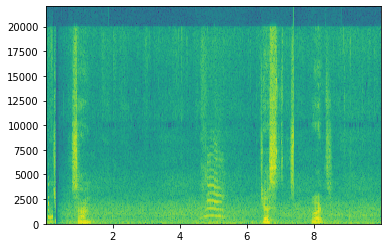

In [10]:
num_train = 100   # number of training samples in each portion of training set
num_portion = 20  # number of portions of training set

for idx in range(num_portion):
    X_train = np.zeros((num_train, len_input, num_freq))
    Y_train = np.zeros((num_train, len_output, 1))

    for i in range(num_train):
        x, y = generate_sample(backgrounds, positives, negatives)
        X_train[i] = x.T; Y_train[i] = y.T
        
    np.save('./train/X_train' + str(idx+1) + '.npy', X_train)
    np.save('./train/Y_train' + str(idx+1) + '.npy', Y_train)
    print("portion #" + str(idx+1) + " of training set is complete")

In [11]:
# num_test = 200   # number of samples in test set
# X_test = np.zeros((num_test, len_input, num_freq))
# Y_test = np.zeros((num_test, len_output, 1))

# for i in range(num_test):
#     x, y = generate_sample(backgrounds, positives, negatives)
#     X_test[i] = x.T; Y_test[i] = y.T
        
# np.save('./train/X_test.npy', X_test)
# np.save('./train/Y_test.npy', Y_test)
# print("generating test set is complete")